In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
# coding=utf-8

import argparse
import os
import sys

import numpy as np
import pandas as pd
import h5py

import keras.backend as K
from keras.models import model_from_json

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

try:
    from evolutron.engine import DeepTrainer
    from evolutron.networks import custom_layers
    from evolutron.tools import aa2hot, Handle, load_dataset, shape, file_db
    from evolutron.tools.data_tools import pad_or_clip_seq
except ImportError:

    sys.path.insert(0, os.path.abspath('..'))
    from evolutron.engine import DeepTrainer
    from evolutron.networks import custom_layers
    from evolutron.tools import aa2hot, Handle, load_dataset, shape, file_db
    from evolutron.tools.data_tools import pad_or_clip_seq

Using Theano backend.


In [41]:
model = 'models/hsapiens/256_30_101_1_1_DeepCoDER.model'
handle = Handle.from_filename(model)
with np.load('embeddings/' + handle.dataset + '/' + handle.filename.split('.')[0] + '.embed.npz') as f:
    emb = f['arr_0']
print('Loaded embeddings')

Loaded embeddings


In [58]:
low_values_ind = emb < 0.5
high_values_ind = emb > 0.5
emb[low_values_ind] = .0
emb[high_values_ind] = 1.
proteins = pd.read_hdf('datasets/' + file_db[handle.dataset].split('.')[0] + '.h5', 'raw_data')
embeddings = pd.DataFrame(emb, index=proteins.index, columns=['Emb{}'.format(i) for i in range(emb.shape[1])])

In [60]:
tsne = TSNE(n_components=2, random_state=0, verbose=2, metric='euclidean', method='barnes_hut')

In [61]:
Y = tsne.fit_transform(emb)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 20154
[t-SNE] Computed conditional probabilities for sample 2000 / 20154
[t-SNE] Computed conditional probabilities for sample 3000 / 20154
[t-SNE] Computed conditional probabilities for sample 4000 / 20154
[t-SNE] Computed conditional probabilities for sample 5000 / 20154
[t-SNE] Computed conditional probabilities for sample 6000 / 20154
[t-SNE] Computed conditional probabilities for sample 7000 / 20154
[t-SNE] Computed conditional probabilities for sample 8000 / 20154
[t-SNE] Computed conditional probabilities for sample 9000 / 20154
[t-SNE] Computed conditional probabilities for sample 10000 / 20154
[t-SNE] Computed conditional probabilities for sample 11000 / 20154
[t-SNE] Computed conditional probabilities for sample 12000 / 20154
[t-SNE] Computed conditional probabilities for sample 13000 / 20154
[t-SNE] Computed conditional probabilities 

KeyboardInterrupt: 

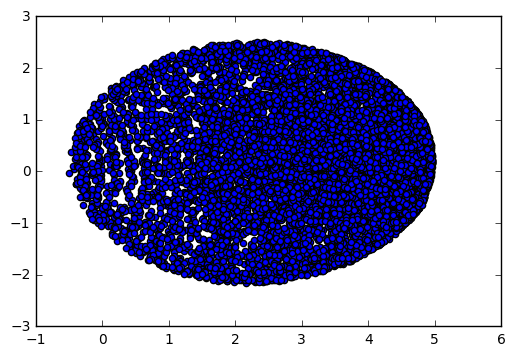

In [32]:
plt.scatter(Y[:,0], Y[:,1])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 20154
[t-SNE] Computed conditional probabilities for sample 2000 / 20154
[t-SNE] Computed conditional probabilities for sample 3000 / 20154
[t-SNE] Computed conditional probabilities for sample 4000 / 20154
[t-SNE] Computed conditional probabilities for sample 5000 / 20154
[t-SNE] Computed conditional probabilities for sample 6000 / 20154
[t-SNE] Computed conditional probabilities for sample 7000 / 20154
[t-SNE] Computed conditional probabilities for sample 8000 / 20154
[t-SNE] Computed conditional probabilities for sample 9000 / 20154
[t-SNE] Computed conditional probabilities for sample 10000 / 20154
[t-SNE] Computed conditional probabilities for sample 11000 / 20154
[t-SNE] Computed conditional probabilities for sample 12000 / 20154
[t-SNE] Computed conditional probabilities for sample 13000 / 20154
[t-SNE] Computed conditional probabilities 

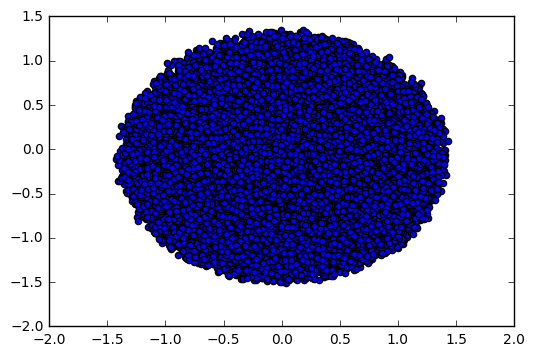

In [59]:
tsne = TSNE(n_components=2, verbose=2, metric='hamming', method='barnes_hut')
Y = tsne.fit_transform(emb)
plt.scatter(Y[:,0], Y[:,1])

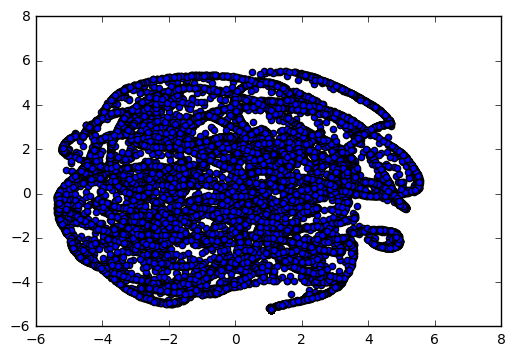

In [38]:
with np.load('embeddings/hsapiens/200_100_44_50_realDeepCoDER.Y.embed.npz') as f:
    y = f['arr_0']
plt.scatter(y[:,0], y[:,1])